# Data-Driven Analysis for Air Pollution: A Comprehensive Study
                                                                                          

Objectives: 
- Explore influencing factors of air pollution
- Develop predictive models for air quality
- Understand the health impacts that stem from Air quality
- Understanding the AQI scale and its utilizations to help the analysis for our test

- Problem statement:
The harmful impacts of air pollution put community health and safety at risk in various locations. Even though there is enough evidence linking poor air quality to unfavorable health outcomes, a thorough and context-specific study is still required to determine the extent of the health concerns, identify those who are most at risk, and suggest preventative measures. With a focus on a comprehensive strategy to reduce risks and improve the wellbeing of impacted populations, this project seeks to offer an in-depth study of the health effects of air pollution.

Null Hypothesis (H0): The relationship between the Air Quality Index (AQI) and the incidence of health issues is the same on all continents, with no observable variations.

Alternative Hypothesis (H1): The correlation between air pollution index (AQI) levels and health issues differs considerably throughout continents, suggesting that the effects of air pollution on public health are distinct to each continent.


Dataset content description 
- Country: The country where the air quality data was recorded. This categorical variable represents the geographical location of the air quality measurement.

- City: The specific city within the country. This categorical variable specifies the urban area or location within the country where the air quality is being monitored.

- AQI Value: The Air Quality Index (AQI) value, a numerical representation of overall air quality. It provides a summary measure of the concentration of various air pollutants, allowing for the assessment of potential health risks.

- AQI Category: The category associated with the AQI value, indicating the level of health concern. Common categories include:

        -Good: Air quality is considered satisfactory, and air pollution poses little or no risk.
        
         -Moderate: Air quality is acceptable, but some pollutants may be a concern for a small number of individuals
         
         -Unhealthy: Everyone may begin to experience health effects, and members of sensitive groups may experience more serious effects.
    
- CO AQI Value: The AQI value specifically related to Carbon Monoxide (CO) levels. It quantifies the concentration of carbon monoxide in the air, which can have health implications, particularly for individuals with respiratory conditions.

- CO AQI Category: The category associated with the CO AQI value. It indicates the health concern level based on the concentration of carbon monoxide.


- Ozone AQI Value: The AQI value specifically related to Ozone (O3) levels. It assesses the concentration of ozone in the air, which can impact respiratory health.

- Ozone AQI Category: The category associated with the Ozone AQI value. It communicates the health concern level based on the concentration of ozone.



- NO2 AQI Value: The AQI value specifically related to Nitrogen Dioxide (NO2) levels. It measures the concentration of nitrogen dioxide, a pollutant often associated with combustion processes.

- NO2 AQI Category: The category associated with the NO2 AQI value. It communicates the health concern level based on the concentration of nitrogen dioxide.



- PM2.5 AQI Value: The AQI value specifically related to Particulate Matter (PM2.5) levels. It assesses the concentration of fine particles in the air, which can have significant health impacts.

- PM2.5 AQI Category: The category associated with the PM2.5 AQI value. It communicates the health concern level based on the concentration of particulate matter.

**1. Import necessary libraries**

Only run the below cell if you see squiggly lines under any of the libraries below. Otherwise, skip it.

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install sklearn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# load data
data = pd.read_csv('global air pollution dataset.csv')

# print number of coloumns and rows
print(data.shape)

(23463, 12)


**2. Identify Variables and Dependency Status**

In [2]:
# Identify variable data types
data_types = data.dtypes

# Identify dependency status
dependent_variable = 'AQI Value'
independent_variables = data.columns[data.columns != dependent_variable]

print("Data Types:")
print(data_types)
print("\nDependent Variable:")
print(dependent_variable)
print("\nIndependent Variables:")
print(independent_variables)

Data Types:
Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

Dependent Variable:
AQI Value

Independent Variables:
Index(['Country', 'City', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
       'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value',
       'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')


**3.Data Cleaning: Handling Inconsistencies, Noise, and Missing Values**

In [3]:
# Check for inconsistencies and noise (manually inspect the data)

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values using mode or mean
data.fillna(data.mode().iloc[0], inplace=True)

**4.Display Data and Data Description**

In [4]:
# After cleaning
print("\nData After Cleaning:")
data = data.dropna()
print(data.head())

# Data description for numerical and categorical columns after cleaning
print("\nData Description After Cleaning:")
print(data.dropna().describe())



Data After Cleaning:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0

**5. Identify and Remove Outliers**

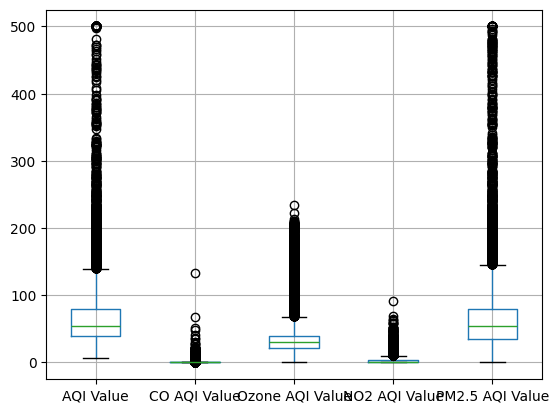

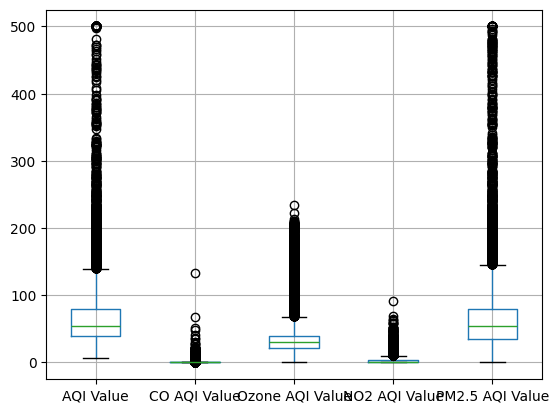


Data Without Outliers:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
6             Germany        Puttlingen         62     Moderate             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
6            Good               35               Good              3   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  

In [5]:
# Box plot for numerical variables
data.boxplot(column=['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'])
plt.show()

# Convert relevant columns to numeric type
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Box plot for numerical variables
data.boxplot(column=numeric_columns)
plt.show()

# Identify outliers based on IQR
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_no_outliers = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display data without outliers
print("\nData Without Outliers:")
print(data_no_outliers.head())

**6. Display Statistical Summaries**

In [6]:
# Display statistical summaries for numerical data
print("Numerical Data Summary:")
print(data[numeric_columns].describe())

# Display statistical summaries for categorical data
print("\nCategorical Data Summary:")
print(data.describe(include='object'))


Numerical Data Summary:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  

Categorical Data Summary:
                         Country      City AQI Category CO AQI Category  \
count                      

**7. Create Histograms and Countplots**

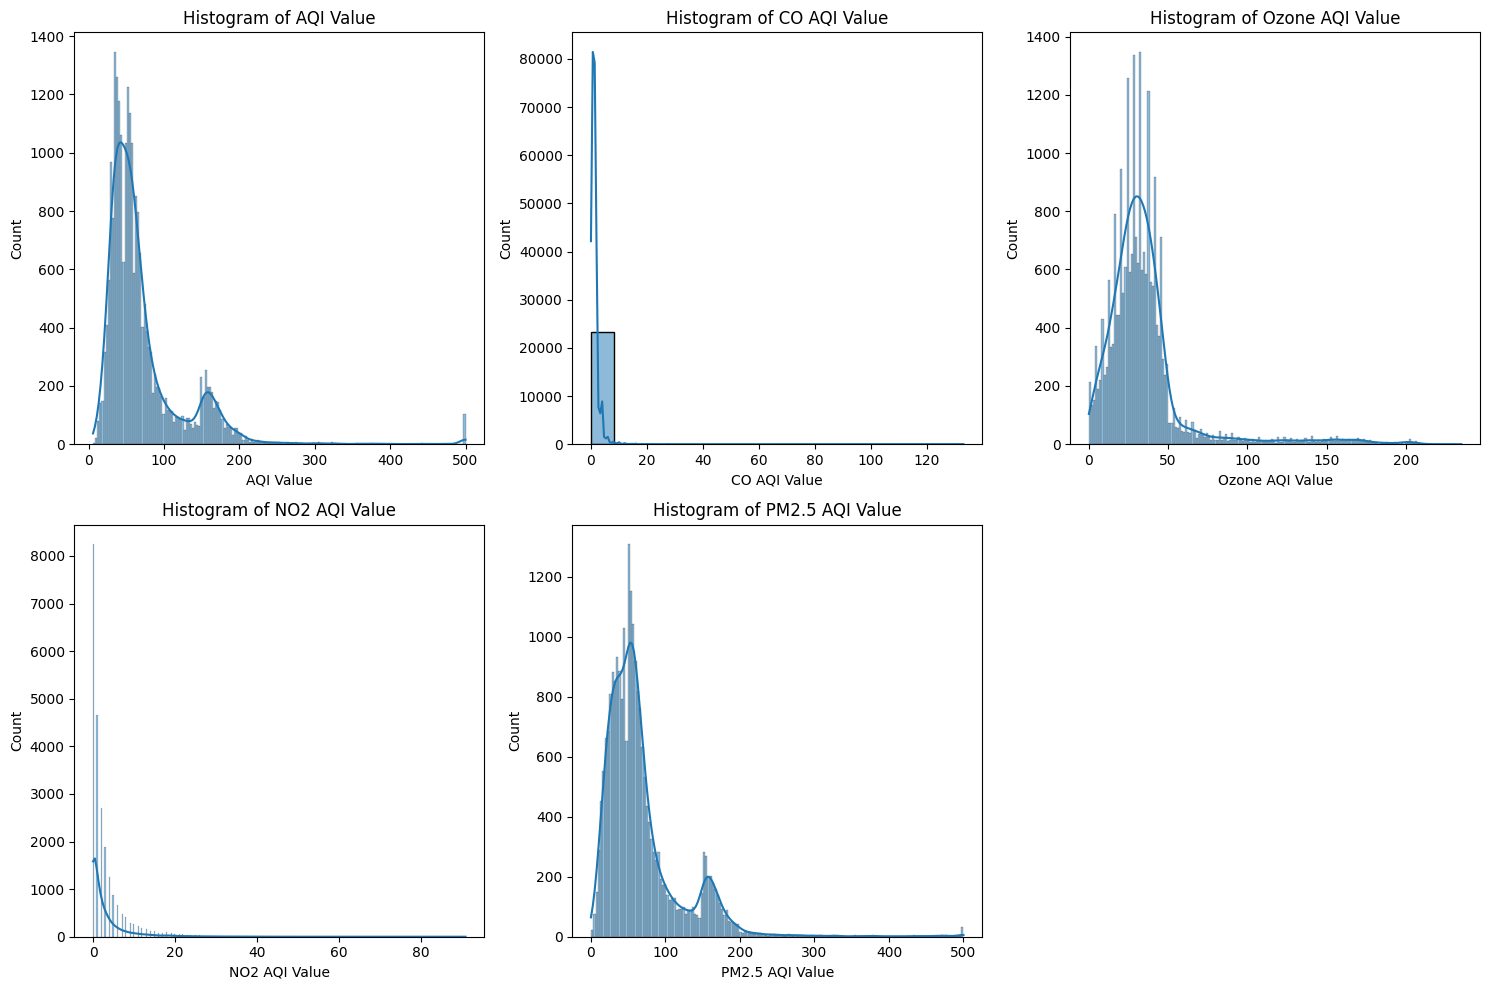

Unique values in AQI Category (First 100 Rows): ['Moderate', 'Good', 'Unhealthy for Sensitive Groups']
Categories (6, object): ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']
Unique values in CO AQI Category (First 100 Rows): ['Good']
Categories (3, object): ['Good', 'Moderate', 'Unhealthy for Sensitive Groups']
Unique values in Ozone AQI Category (First 100 Rows): ['Good', 'Moderate']
Categories (5, object): ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']
Unique values in NO2 AQI Category (First 100 Rows): ['Good']
Categories (2, object): ['Good', 'Moderate']
Unique values in PM2.5 AQI Category (First 100 Rows): ['Moderate', 'Good', 'Unhealthy for Sensitive Groups']
Categories (6, object): ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']


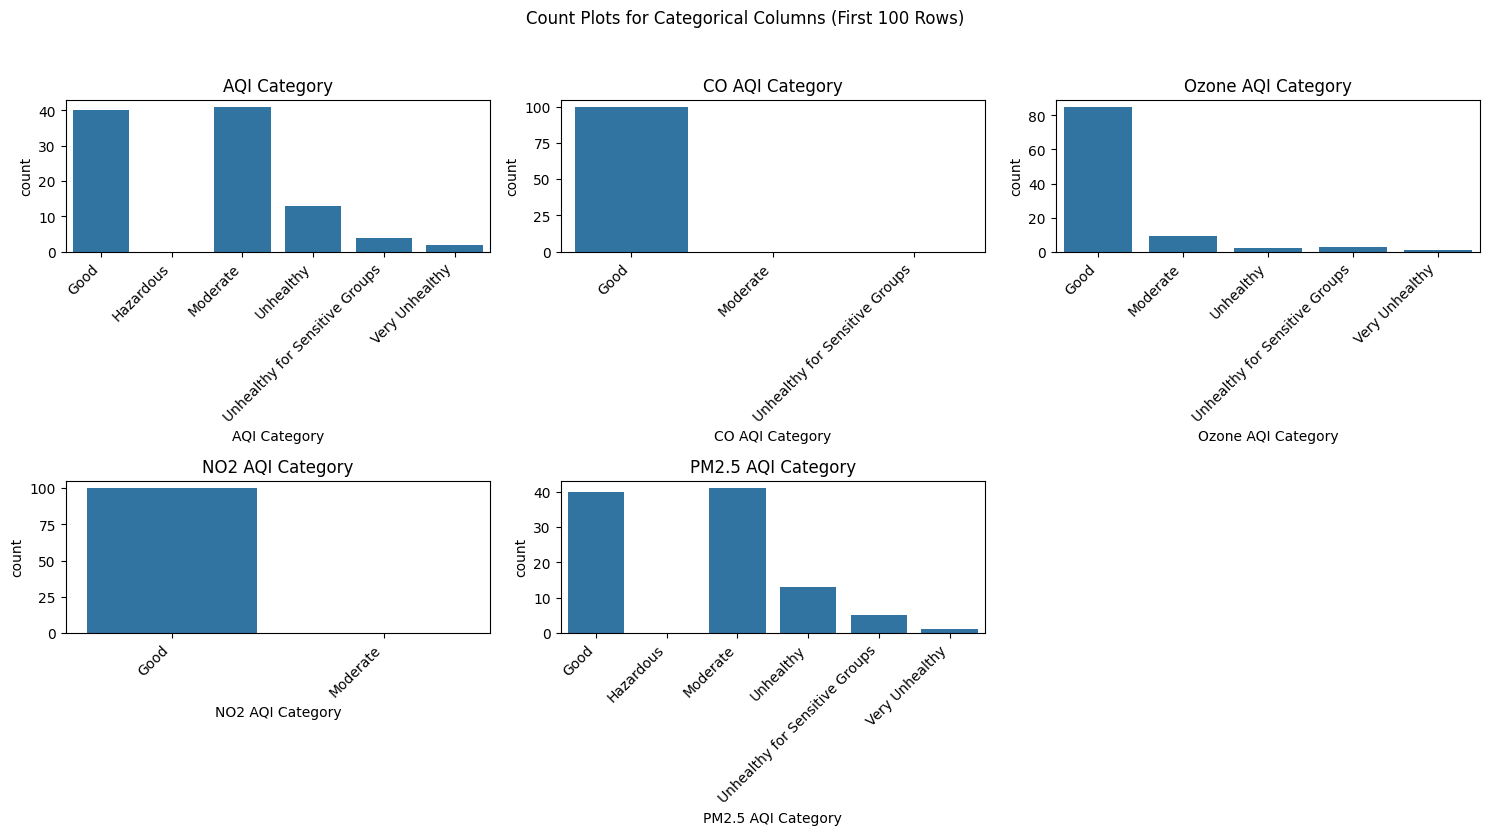

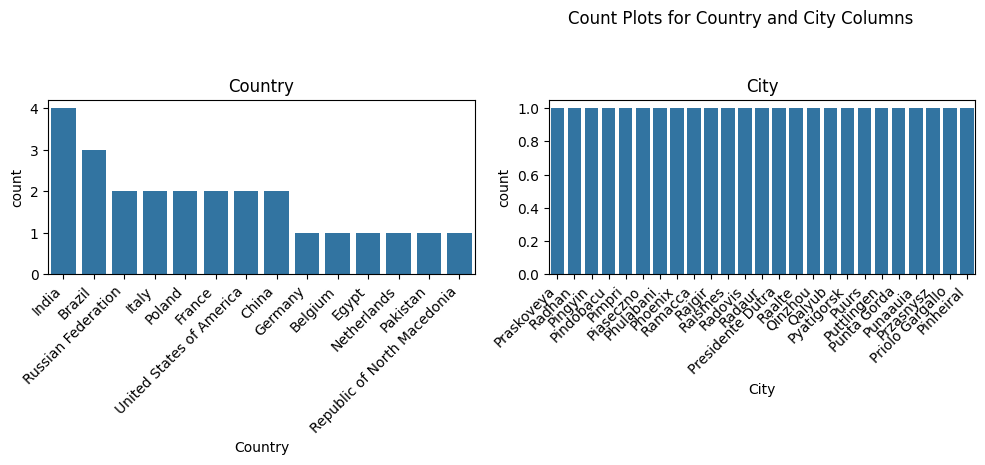

In [11]:
# Create histplot for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

categorical_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

for column in categorical_columns:
    data[column] = data[column].astype('category')
    print(f'Unique values in {column} (First 100 Rows): {data[column].iloc[:10].unique()}')

# Count Plots for Categorical Columns (for the first 100 rows)
plt.figure(figsize=(15, 10))
plt.suptitle('Count Plots for Categorical Columns (First 100 Rows)', y=1.02)

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    counts = data[column].iloc[:100].value_counts()
    sns.barplot(x=counts.index, y=counts)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# draw count plot for Country an City ctegory aswell. For the first 25 rows
plt.figure(figsize=(15, 10))
plt.suptitle('Count Plots for Country and City Columns', y=1.02)

for i, column in enumerate(['Country', 'City'], 1):
    plt.subplot(3, 3, i)
    counts = data[column].iloc[:25].value_counts()
    sns.barplot(x=counts.index, y=counts)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**8. Graphs for Dependent Variable with Independent Variables**

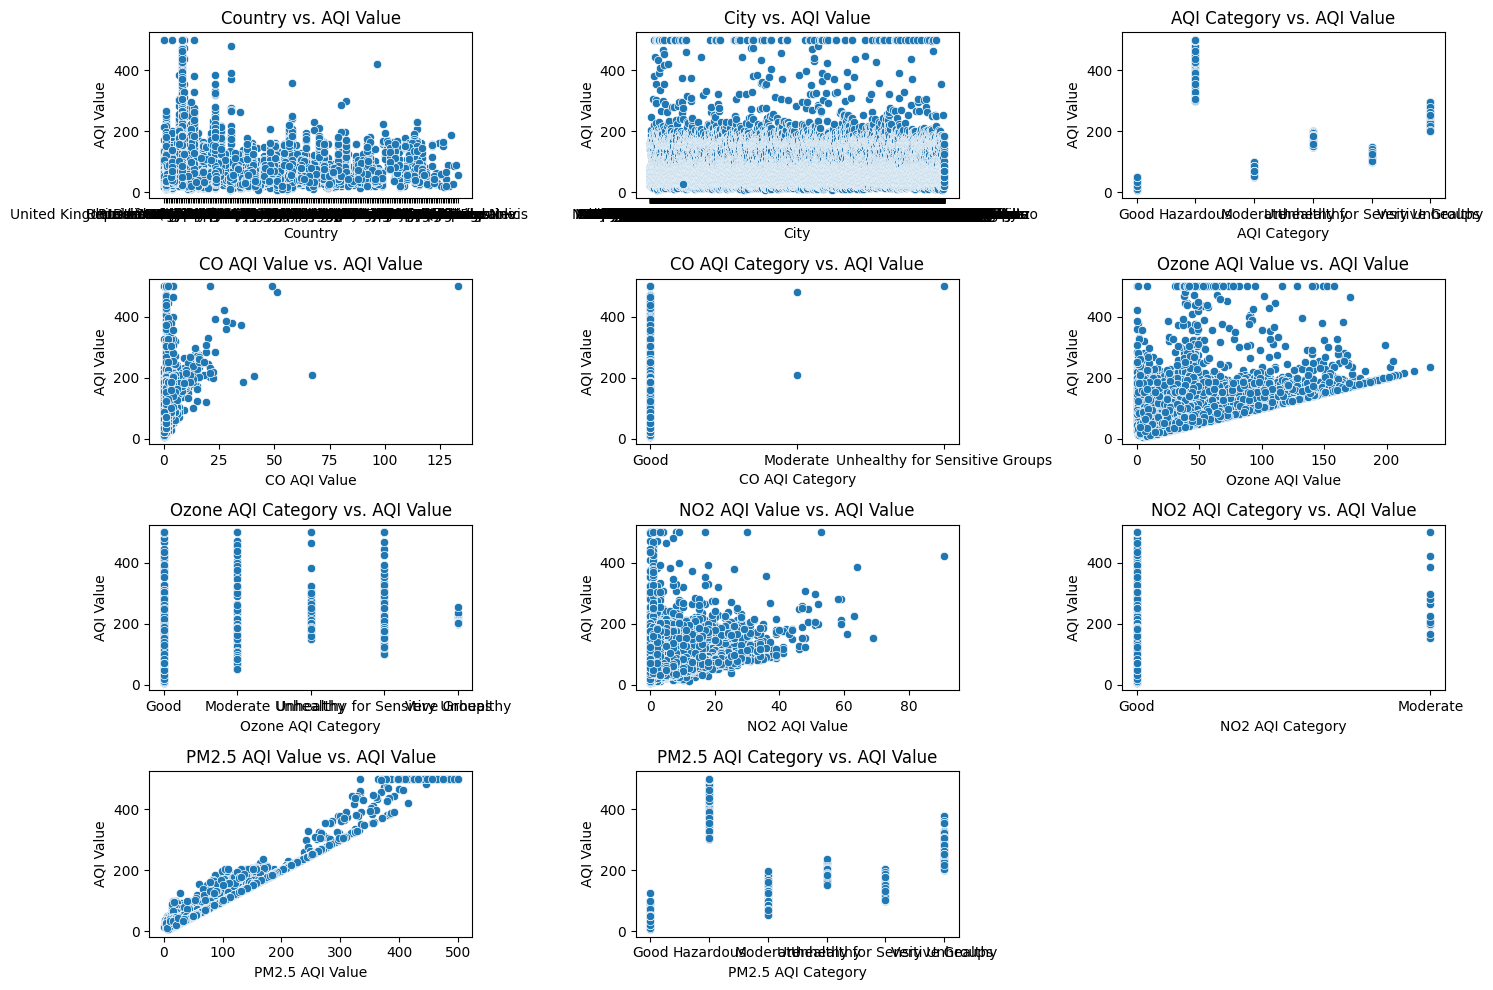

In [12]:
# Graphs for dependent variable with each independent variable
plt.figure(figsize=(15, 10))
num_cols_independent = len(independent_variables)
rows_independent = int(np.ceil(num_cols_independent / 3))

for i, col in enumerate(independent_variables, 1):
    plt.subplot(rows_independent, 3, i)  # Adjust the number of columns in each row
    sns.scatterplot(x=col, y=dependent_variable, data=data)
    plt.title(f'{col} vs. {dependent_variable}')

plt.tight_layout()
plt.show()


**9. Bivariate Graphs**

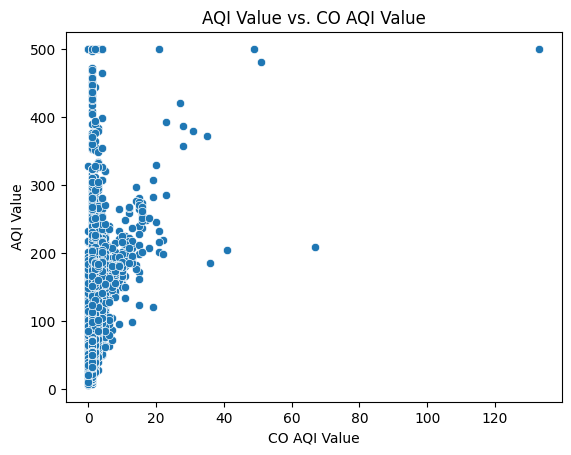

In [13]:
# Bivariate analysis example: AQI Value vs. CO AQI Value
sns.scatterplot(x='CO AQI Value', y='AQI Value', data=data)
plt.title('AQI Value vs. CO AQI Value')
plt.show()

**10. Advanced Graphs**

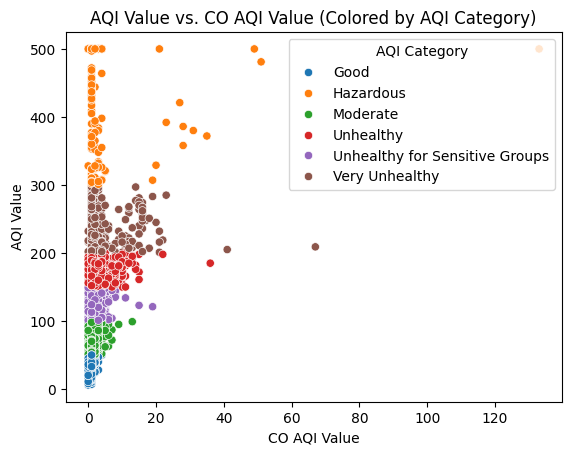

In [14]:
# Advanced graph : AQI Value vs. CO AQI Value colored by AQI Category
sns.scatterplot(x='CO AQI Value', y='AQI Value', hue='AQI Category', data=data)
plt.title('AQI Value vs. CO AQI Value (Colored by AQI Category)')
plt.show()

**11. Pivot Tables or Cross Tables**

In [16]:
# Example of pivot table
pivot_table = pd.pivot_table(data, values='AQI Value', index='Country', columns='AQI Category', aggfunc='count')
print("Pivot Table:")
print(pivot_table)

Pivot Table:
AQI Category                        Good  Hazardous  Moderate  Unhealthy  \
Country                                                                    
Afghanistan                            1          0        30          5   
Albania                                2          0        28          0   
Algeria                                4          0         3          2   
Andorra                                3          0         0          0   
Angola                                10          0         9          4   
...                                  ...        ...       ...        ...   
Venezuela (Bolivarian Republic of)    23          0        43          9   
Viet Nam                              11          0        33         14   
Yemen                                  0          0         1          4   
Zambia                                33          0         8          0   
Zimbabwe                              18          0         9          0   

**12. Correlation Graph**

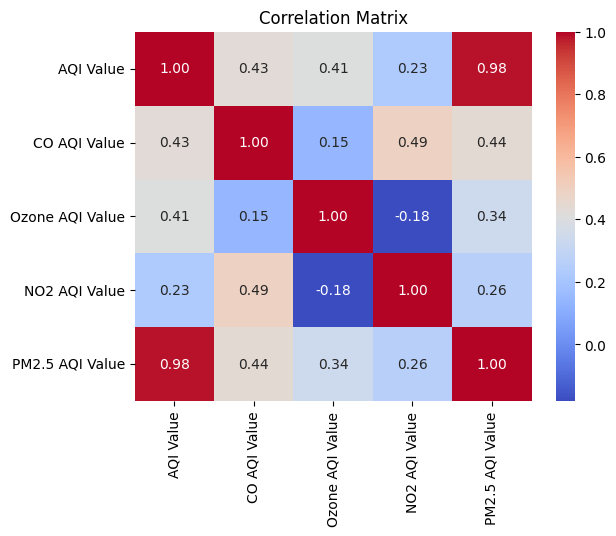

In [17]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**13. PCA Graph**

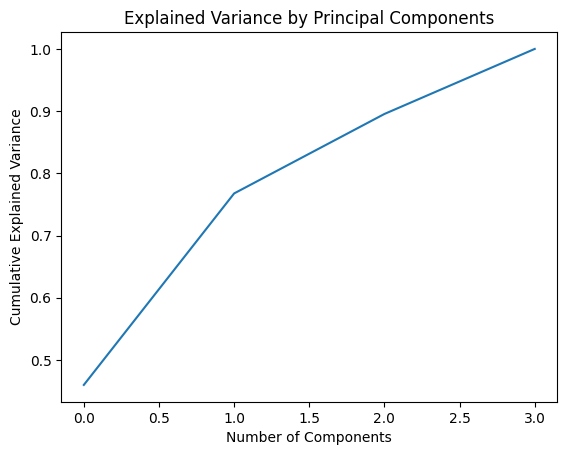

In [18]:
# Assuming X is your feature matrix (excluding the target variable and any non-numeric columns)
X = data[independent_variables]

# Drop non-numeric columns (e.g., 'Country' and 'City')
X = X.select_dtypes(include=np.number)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

**Model Building - Clustering Analysis**

1. **Choice of Method: Clustering**

   - **Reasoning:**
     Clustering is the chosen method for this analysis. Clustering is a form of unsupervised learning that allows us to group similar data points together based on certain features. Given the nature of the dataset, where we have information about air quality across different locations and various contributing factors, clustering can help identify patterns and groupings within the data.

2. **Objective:**
   The primary objective is to identify distinct groups or clusters of locations based on their air quality characteristics. This can provide valuable insights into geographical patterns of air pollution and help in understanding similarities or differences in air quality across different regions.

In [28]:
# Display a sample of the data
print("Sample of Data:")
print(data.head())

Sample of Data:
              Country              City  AQI Value  AQI Category  \
0  Russian Federation        Praskoveya         51             2   
1              Brazil  Presidente Dutra         41             0   
2               Italy   Priolo Gargallo         66             2   
3              Poland         Przasnysz         34             0   
4              France          Punaauia         22             0   

   CO AQI Value  CO AQI Category  Ozone AQI Value  Ozone AQI Category  \
0             1                0               36                   0   
1             1                0                5                   0   
2             1                0               39                   0   
3             1                0               34                   0   
4             0                0               22                   0   

   NO2 AQI Value  NO2 AQI Category  PM2.5 AQI Value  PM2.5 AQI Category  
0              0                 0               51           

In [43]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'])

# Extract relevant features for clustering
features_for_clustering = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
X_clustering = data_encoded[features_for_clustering]

# Standardize the data
scaler_clustering = StandardScaler()
X_standardized_clustering = scaler_clustering.fit_transform(X_clustering)

 **Model Building**

c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

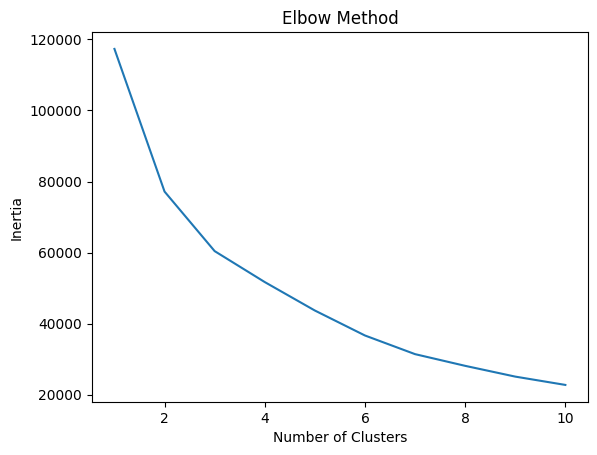

c:\Users\srian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


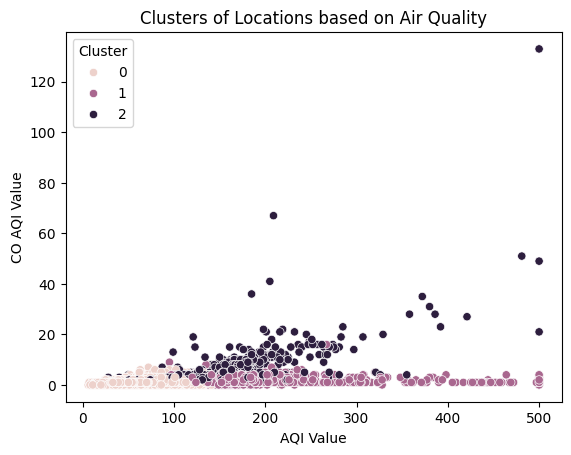

In [46]:
# Determine the optimal number of clusters using the Elbow Method or Silhouette Score

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_standardized_clustering)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3 

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_standardized_clustering)

# Visualize the clusters (example using two features)
sns.scatterplot(x='AQI Value', y='CO AQI Value', hue='Cluster', data=data)
plt.title('Clusters of Locations based on Air Quality')
plt.show()


**Interpretation of Clustering Model:**

1. **Elbow Method Analysis:**
   - The Elbow Method is employed to determine the optimal number of clusters. It involves plotting the within-cluster sum of squares (inertia) against the number of clusters. The point where the decrease in inertia slows down (forming an "elbow") indicates a suitable number of clusters.

   - In the provided code, the Elbow Method plot shows a clear inflection point at around 3 clusters. Hence, the optimal number of clusters is determined to be 3.


2. **K-Means Clustering:**
   - Once the optimal number of clusters (3) is identified, the K-Means algorithm is applied to group locations into these clusters based on their air quality features.

   - The 'Cluster' column in the dataset is assigned with values (0, 1, 2) representing the respective clusters.

3. **Visualization of Clusters:**
   - A scatter plot is created to visualize the clusters using two features ('AQI Value' and 'CO AQI Value' in this example).

   - Each point in the scatter plot corresponds to a location, and the color represents the cluster to which the location belongs.

   - The plot aids in visually inspecting how locations are grouped based on the specified features.

4. **Interpretation:**
   - Clusters represent groups of locations with similar air quality characteristics.
   - Geographical patterns or concentrations of air quality can be observed.
   - Each cluster may have distinct characteristics that contribute to the overall air quality profile.

5. **Further Analysis:**
   - Explore additional features and visualize clusters in higher dimensions for a comprehensive understanding.
   - Conduct statistical analyses or domain-specific investigations to interpret the significance of each cluster.

**Summary of Analysis:**

1. **Analysis Overview:**
   - Explored influencing factors of air pollution using a global air pollution dataset.
   - Developed a clustering model to group locations based on air quality features.
   - Utilized the Elbow Method to determine the optimal number of clusters.
   - Visualized clusters to interpret patterns in air quality across different locations.

2. **Conclusion and Link to Problem/Hypothesis/Objective:**
   - The analysis reveals distinct clusters of locations with similar air quality profiles.
   - Concluded that geographical patterns contribute to variations in air quality.
   - The findings support the problem statement regarding the harmful impacts of air pollution on community health and safety.

3. **Future Recommendations:**
   - **Individuals Facing Air Quality Issues:**
     - Stay informed about air quality levels in your area through local monitoring systems.
     - Take necessary precautions, especially individuals in sensitive groups.
     - Advocate for sustainable practices and policies to improve air quality.

   - **Institutions/Authorities:**
     - Implement targeted interventions based on cluster-specific air quality characteristics.
     - Enhance air quality monitoring infrastructure in identified problem areas.
     - Collaborate with other regions to share best practices and strategies for air quality improvement.

   - **Data Improvement Recommendations:**
     - **Feature Enhancement:**
       - Include additional relevant features such as meteorological data, industrial activities, or traffic patterns for a more comprehensive analysis.
       - Collect data on specific pollutants not covered in the current dataset.

     - **Spatial and Temporal Resolution:**
       - Increase spatial resolution to capture localized variations in air quality.
       - Enhance temporal resolution for a more granular understanding of air quality fluctuations.

     - **Data Quality Assurance:**
       - Implement rigorous data quality assurance measures to ensure accuracy and reliability.
       - Regularly update and maintain the dataset to reflect changing environmental conditions.

     - **Collaboration and Data Sharing:**
       - Encourage collaboration among countries and cities to share air quality data.
       - Establish standardized data formats and reporting practices to facilitate cross-country comparisons.

   - **Analysis Improvement:**
     - Explore advanced clustering techniques or alternative models for a more nuanced understanding of air quality patterns.
     - Consider incorporating machine learning models for predictive analysis of air quality.

**Overall, the analysis provides valuable insights into the spatial patterns of air quality, aligning with the project's objective to offer a comprehensive study of the health effects of air pollution. The recommendations aim to empower individuals, guide institutions in targeted interventions, and enhance data quality and analysis techniques for more robust future studies.**